<a href="https://colab.research.google.com/github/joyhuerta/IAP1/blob/main/P1_1_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Entrenando . . .
¡Modelo entrenado!


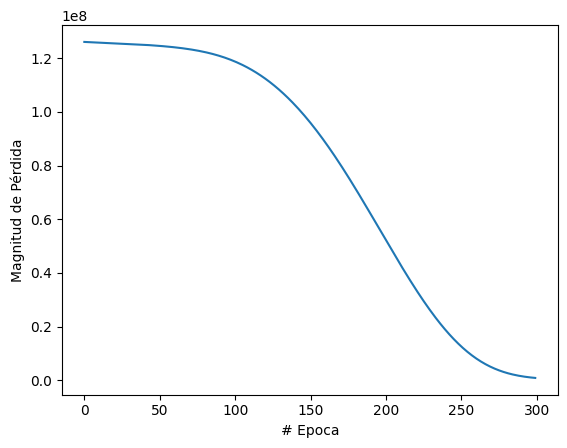

Realiza una predicción


1/1 [==============================] - 0s 166ms/step
El resultado es: [[5173.791]] gramos
kg_a_gramos.h5	peso  sample_data
mkdir: cannot create directory ‘peso’: File exists
2023-11-30 07:45:33.422491: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-30 07:45:33.422568: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-30 07:45:33.424817: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-30 07:45:34.887655: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
group1-shard1of1.bin  group1-shard1of1-peso.bin  model.json  model-

In [5]:
import tensorflow as tf
import numpy as np

kilogramos = np.array([1, 2, 5, 10, 15, 20], dtype=float)
gramos = np.array([1000, 2000, 5000, 10000, 15000, 20000], dtype=float)

oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss='mean_squared_error'
)

print("Entrenando . . .")
historial = modelo.fit(kilogramos, gramos, epochs=300, verbose=False)
print("¡Modelo entrenado!")

import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de Pérdida")
plt.plot(historial.history["loss"])
plt.show()

print("Realiza una predicción")
resultado = modelo.predict([5])
print("El resultado es: " + str(resultado) + " gramos")

modelo.save('kg_a_gramos.h5')

!ls

!pip install tensorflowjs
!mkdir peso
!tensorflowjs_converter --input_format keras kg_a_gramos.h5 peso
!ls peso